<a href="https://colab.research.google.com/github/ArshiaRa/Crime-category-with-NN-and-logistic-regression/blob/main/NN_and_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model 
from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.optimizers import Adam
import tensorflow as tf
from keras import regularizers

In [ ]:
!pip install dython
from dython.nominal import associations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Analysing and viewing the data

In [ ]:
df= pd.read_csv ('/content/reduced_version_data(1).csv')
df

,Sector,Community Name,Group Category,Category,Crime Count,Resident Count,Year,Month
0,NORTHEAST,WHITEHORN,Crime,Street Robbery,1,12019,2019,SEP
1,EAST,FOOTHILLS,Crime,Theft OF Vehicle,10,317,2019,NOV
2,SOUTH,ACADIA,Crime,Theft FROM Vehicle,13,10520,2019,SEP
3,SOUTHEAST,MAHOGANY,Crime,Theft OF Vehicle,1,11784,2019,NOV
4,WEST,LINCOLN PARK,Crime,Commercial Break & Enter,5,2617,2019,NOV
...,...,...,...,...,...,...,...,...
99995,SOUTH,WOODBINE,Disorder,Physical Disorder,2,9131,2013,JAN
99996,WEST,NORTH GLENMORE PARK,Crime,Assault (Non-domestic),2,2333,2014,MAR
99997,SOUTH,HAYSBORO,Disorder,Physical Disorder,5,6943,2012,SEP
99998,SOUTH,FAIRVIEW INDUSTRIAL,Disorder,Social Disorder,7,0,2013,MAR


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Sector          100000 non-null  object
 1   Community Name  100000 non-null  object
 2   Group Category  100000 non-null  object
 3   Category        100000 non-null  object
 4   Crime Count     100000 non-null  int64 
 5   Resident Count  100000 non-null  int64 
 6   Year            100000 non-null  int64 
 7   Month           100000 non-null  object
dtypes: int64(3), object(5)
memory usage: 6.1+ MB


Text(0.5, 0, 'Year')

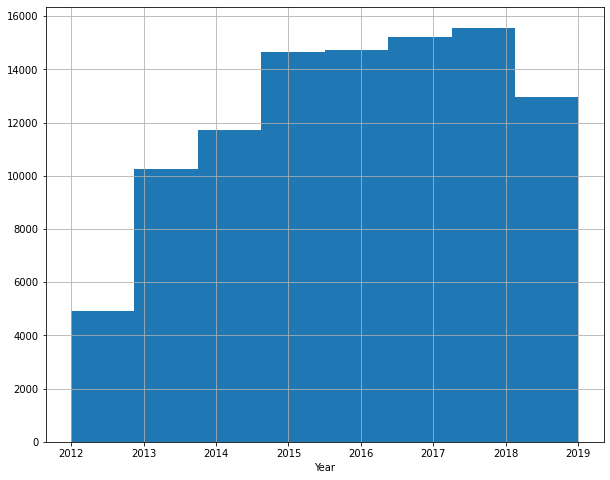

In [ ]:
plt.figure(figsize=(10, 8))
df.Year.hist(bins=df.Year.nunique())
plt.xlabel('Year')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


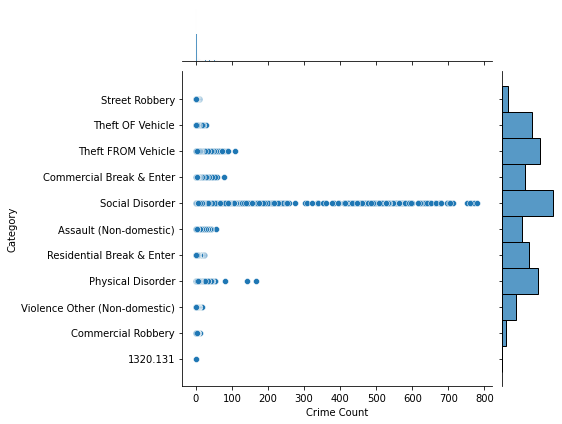

In [ ]:
sns.jointplot(df["Crime Count"], df.Category)

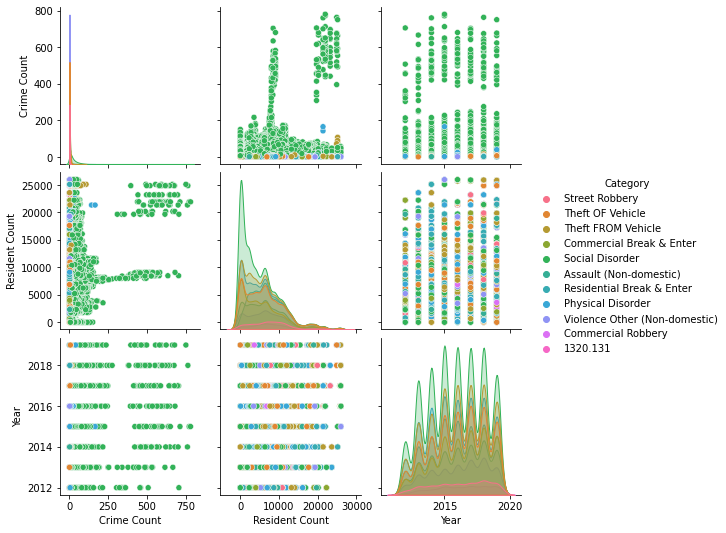

In [ ]:
sns.pairplot(df, hue='Category')

<AxesSubplot:ylabel='Frequency'>

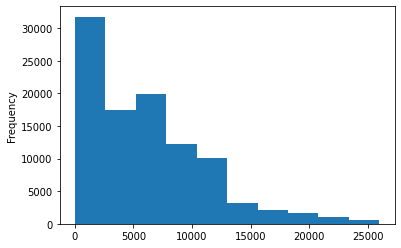

In [ ]:
df['Resident Count'].plot(kind = 'hist')

In [ ]:
df.isnull().values.any()

False

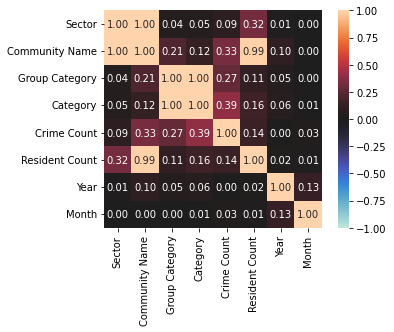

{'corr':                   Sector  Community Name  Group Category  Category  \
 Sector          1.000000        0.996559        0.044732  0.045672   
 Community Name  0.996559        1.000000        0.211473  0.118023   
 Group Category  0.044732        0.211473        1.000000  0.999955   
 Category        0.045672        0.118023        0.999955  1.000000   
 Crime Count     0.087364        0.332007        0.274268  0.392315   
 Resident Count  0.321216        0.991292        0.105092  0.161716   
 Year            0.014767        0.100449        0.045512  0.060167   
 Month           0.000000        0.000000        0.000000  0.005505   
 
                 Crime Count  Resident Count      Year     Month  
 Sector             0.087364        0.321216  0.014767  0.000000  
 Community Name     0.332007        0.991292  0.100449  0.000000  
 Group Category     0.274268        0.105092  0.045512  0.000000  
 Category           0.392315        0.161716  0.060167  0.005505  
 Crime Count    

In [ ]:
associations(df)

In [ ]:
x = df.drop(columns='Category')
y = df['Category']
x = pd.get_dummies(data=x, drop_first=True)

y
x

,Crime Count,Resident Count,Year,Sector_EAST,Sector_NORTH,Sector_NORTHEAST,Sector_NORTHWEST,Sector_SOUTH,Sector_SOUTHEAST,Sector_WEST,...,Month_DEC,Month_FEB,Month_JAN,Month_JUL,Month_JUN,Month_MAR,Month_MAY,Month_NOV,Month_OCT,Month_SEP
0,1,12019,2019,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,10,317,2019,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,13,10520,2019,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,11784,2019,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,5,2617,2019,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2,9131,2013,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
99996,2,2333,2014,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
99997,5,6943,2012,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
99998,7,0,2013,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
le = preprocessing.LabelEncoder()
le.fit(y)
y

0                  Street Robbery
1                Theft OF Vehicle
2              Theft FROM Vehicle
3                Theft OF Vehicle
4        Commercial Break & Enter
                   ...           
99995           Physical Disorder
99996      Assault (Non-domestic)
99997           Physical Disorder
99998             Social Disorder
99999            Theft OF Vehicle
Name: Category, Length: 100000, dtype: object

In [ ]:
y.shape

(100000,)

In [ ]:
type(x)

pandas.core.frame.DataFrame

In [ ]:
column = 'Year'
x[column] = (x[column] - x[column].min()) / (x[column].max() - x[column].min())    

column = 'Resident Count'
x[column] = (x[column] - x[column].min()) / (x[column].max() - x[column].min())   

In [ ]:
x

,Crime Count,Resident Count,Year,Sector_EAST,Sector_NORTH,Sector_NORTHEAST,Sector_NORTHWEST,Sector_SOUTH,Sector_SOUTHEAST,Sector_WEST,...,Month_DEC,Month_FEB,Month_JAN,Month_JUL,Month_JUN,Month_MAR,Month_MAY,Month_NOV,Month_OCT,Month_SEP
0,1,0.462447,1.000000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,10,0.012197,1.000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,13,0.404771,1.000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0.453405,1.000000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,5,0.100693,1.000000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2,0.351327,0.142857,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
99996,2,0.089765,0.285714,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
99997,5,0.267141,0.000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
99998,7,0.000000,0.142857,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
y

0                  Street Robbery
1                Theft OF Vehicle
2              Theft FROM Vehicle
3                Theft OF Vehicle
4        Commercial Break & Enter
                   ...           
99995           Physical Disorder
99996      Assault (Non-domestic)
99997           Physical Disorder
99998             Social Disorder
99999            Theft OF Vehicle
Name: Category, Length: 100000, dtype: object

In [ ]:
X_train, X_dev, y_train, y_dev = train_test_split (x,y, train_size=0.7)

In [ ]:
X_train.shape, y_train.shape, X_dev.shape, y_dev.shape

((70000, 321), (70000,), (30000, 321), (30000,))

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_dev = scaler.transform(X_dev)

# Logistic Regression

In [ ]:
# I didn't set random_state to any number, so a slighty different result from the report, and notebook is because of this
model = linear_model.LogisticRegression(multi_class='multinomial',solver='newton-cg', max_iter=23,
                                        penalty = 'l2' , C = 100)

model.fit(X_train, y_train)

Prediction = model.predict(X_dev)

print('Score(X_train, y_train): ',model.score(X_train, y_train))

print('Score(X_dev, y_dev): ',model.score(X_dev, y_dev))

print('f1 score (Predictions, y_dev):',f1_score(Prediction, y_dev, average='micro'))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


Score(X_train, y_train):  0.5343857142857142
Score(X_dev, y_dev):  0.5177333333333334
f1 score (Predictions, y_dev): 0.5177333333333334


<AxesSubplot:>

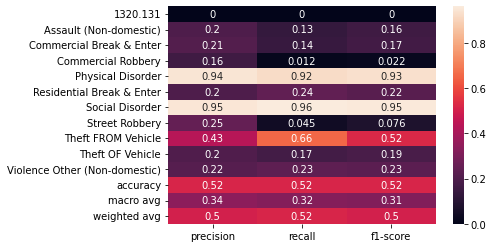

In [ ]:
clf_report= metrics.classification_report(y_dev, Prediction, digits=3, zero_division=0,
                                    output_dict = True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [ ]:
y_dev

56245              Social Disorder
76052             Theft OF Vehicle
64373               Street Robbery
97889     Commercial Break & Enter
66171    Residential Break & Enter
                   ...            
5194     Residential Break & Enter
51368           Theft FROM Vehicle
32203            Physical Disorder
96135     Commercial Break & Enter
80294            Physical Disorder
Name: Category, Length: 30000, dtype: object

# Neural Network



In [ ]:
df

,Sector,Community Name,Group Category,Category,Crime Count,Resident Count,Year,Month
0,NORTHEAST,WHITEHORN,Crime,Street Robbery,1,12019,2019,SEP
1,EAST,FOOTHILLS,Crime,Theft OF Vehicle,10,317,2019,NOV
2,SOUTH,ACADIA,Crime,Theft FROM Vehicle,13,10520,2019,SEP
3,SOUTHEAST,MAHOGANY,Crime,Theft OF Vehicle,1,11784,2019,NOV
4,WEST,LINCOLN PARK,Crime,Commercial Break & Enter,5,2617,2019,NOV
...,...,...,...,...,...,...,...,...
99995,SOUTH,WOODBINE,Disorder,Physical Disorder,2,9131,2013,JAN
99996,WEST,NORTH GLENMORE PARK,Crime,Assault (Non-domestic),2,2333,2014,MAR
99997,SOUTH,HAYSBORO,Disorder,Physical Disorder,5,6943,2012,SEP
99998,SOUTH,FAIRVIEW INDUSTRIAL,Disorder,Social Disorder,7,0,2013,MAR


In [ ]:
x1 = df.drop(columns='Category')
y1 = df['Category']

In [ ]:
y1

0                  Street Robbery
1                Theft OF Vehicle
2              Theft FROM Vehicle
3                Theft OF Vehicle
4        Commercial Break & Enter
                   ...           
99995           Physical Disorder
99996      Assault (Non-domestic)
99997           Physical Disorder
99998             Social Disorder
99999            Theft OF Vehicle
Name: Category, Length: 100000, dtype: object

In [ ]:
#x1 = x1.drop(columns='Sector')# 321 to 314 

In [ ]:
x1 = pd.get_dummies(data=x1, drop_first=True)
y1 = pd.get_dummies(data=y1, drop_first=True)


In [ ]:
column = 'Year'
x1[column] = (x1[column] - x1[column].min()) / (x1[column].max() - x1[column].min())    



display(x1)

,Crime Count,Resident Count,Year,Sector_EAST,Sector_NORTH,Sector_NORTHEAST,Sector_NORTHWEST,Sector_SOUTH,Sector_SOUTHEAST,Sector_WEST,...,Month_DEC,Month_FEB,Month_JAN,Month_JUL,Month_JUN,Month_MAR,Month_MAY,Month_NOV,Month_OCT,Month_SEP
0,1,12019,1.000000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,10,317,1.000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,13,10520,1.000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,11784,1.000000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,5,2617,1.000000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2,9131,0.142857,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
99996,2,2333,0.285714,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
99997,5,6943,0.000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
99998,7,0,0.142857,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
x1_train, x1_dev, y1_train, y1_dev = train_test_split(x1, y1, test_size=0.3)

In [ ]:


x1_train = scaler.fit_transform(x1_train)
x1_dev = scaler.transform(x1_dev)



In [ ]:
x1_train.shape


(70000, 321)

In [ ]:
y1_train.shape, y1_dev.shape

((70000, 10), (30000, 10))

In [ ]:
# x1_train = x1_train.to_numpy()
# x1_dev = x1_dev.to_numpy()
# y1_train = y1_train.to_numpy()
# y1_dev = y1_dev.to_numpy()
# x1_train[0].shape

In [ ]:
x1_train.shape

(70000, 321)

In [ ]:
y1_train.shape

(70000, 10)

In [ ]:
y1

,Assault (Non-domestic),Commercial Break & Enter,Commercial Robbery,Physical Disorder,Residential Break & Enter,Social Disorder,Street Robbery,Theft FROM Vehicle,Theft OF Vehicle,Violence Other (Non-domestic)
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,1,0,0,0,0,0,0
99996,1,0,0,0,0,0,0,0,0,0
99997,0,0,0,1,0,0,0,0,0,0
99998,0,0,0,0,0,1,0,0,0,0


In [ ]:
model = Sequential()
model.add(Input(shape = (321,)))
model.add(Dense(units = 128,activation = 'relu'))
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(0.5),
model.add(Dense(units = 64,activation = 'relu',kernel_regularizer=regularizers.l1(0.05)))
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(0.7),
model.add(Dense(10, activation = 'softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               41216     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,122
Trainable params: 50,122
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)


In [ ]:
opt = tf.keras.optimizers.experimental.Adam(learning_rate=0.001) 

model.compile(optimizer = opt ,loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
history = model.fit(x1_train,y1_train,batch_size = 1024,epochs = 100, validation_data = (x1_dev,y1_dev))

Epoch 1/100
69/69 [==============================] - 3s 11ms/step - loss: 26.5258 - accuracy: 0.2422 - val_loss: 15.7332 - val_accuracy: 0.2934
Epoch 2/100
69/69 [==============================] - 0s 7ms/step - loss: 9.0799 - accuracy: 0.2835 - val_loss: 4.0510 - val_accuracy: 0.2623
Epoch 3/100
69/69 [==============================] - 0s 7ms/step - loss: 2.6199 - accuracy: 0.2179 - val_loss: 2.1744 - val_accuracy: 0.2085
Epoch 4/100
69/69 [==============================] - 0s 7ms/step - loss: 2.1419 - accuracy: 0.2379 - val_loss: 2.1120 - val_accuracy: 0.2894
Epoch 5/100
69/69 [==============================] - 0s 7ms/step - loss: 2.0568 - accuracy: 0.3106 - val_loss: 1.9904 - val_accuracy: 0.3368
Epoch 6/100
69/69 [==============================] - 0s 7ms/step - loss: 1.9218 - accuracy: 0.3484 - val_loss: 1.8589 - val_accuracy: 0.3582
Epoch 7/100
69/69 [==============================] - 0s 7ms/step - loss: 1.8243 - accuracy: 0.3583 - val_loss: 1.7915 - val_accuracy: 0.3598
Epoch 8/10

In [ ]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


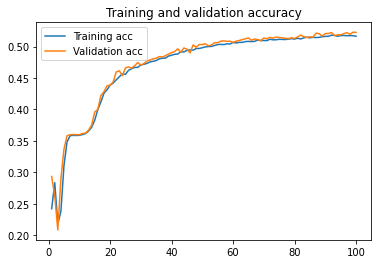

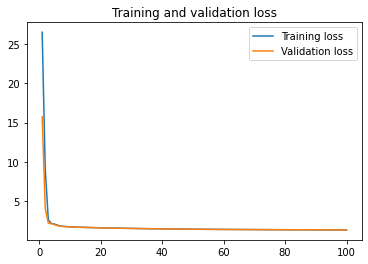

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()